<a target="_blank" rel="noopener noreferrer" href="https://colab.research.google.com/github/epacuit/introduction-machine-learning/blob/main/first-steps/gradient-descent.ipynb">![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)</a>

(gradient-descent)=
# Gradient Descent  



### Training Loop

To train a model, we repeat the following process:

1. Draw a batch of training samples, $x$, and corresponding targets, $y\_true$.

2. Run the model on $x$ (a step called the *forward pass*) to obtain predictions, $y\_pred$. 

3. Compute the loss of the model on the batch, a measure of the mismatch between $y\_pred$ and $y\_true$.

4. Update all weights of the model in a way that slightly reduces the loss on this batch.

### Gradient Descent 

Gradient descent is the optimization method that trains neural networks by updating all model coefficients simultaneously. The core idea is:

* **Smooth, Differentiable Functions**: Neural network operations (like addition and dot products) are smooth. This means a small change in input leads to a small, predictable change in the output.

* **Chain Rule and Differentiability**: When you combine these smooth functions, the overall function—from the model’s coefficients to its loss—remains differentiable. This allows us to compute the gradient.

* **The Gradient**: The gradient is a vector that indicates the direction in which the loss increases most steeply. By moving in the opposite direction of the gradient, we decrease the loss.

* **Simultaneous Updates**: Instead of updating one coefficient at a time, gradient descent updates all of them together in each iteration. This iterative process continues until the loss is minimized.

This technique forms the backbone of modern neural network training by ensuring that each small, guided step reduces the model's error over time.




### Example: 1-Variable Function

Suppose that $f$ is a 1-variable function, and we want to find the value of $x$ that minimizes $f(x)$. We can use gradient descent to find this minimum. The process is as follows:
$$
  x_{\text{new}} = x_{\text{old}} - \alpha \cdot f'(x_{\text{old}})
$$
The explanation of the terms is as follows:

* $x_{\text{old}}$: The current value of the variable.
* $f'(x_{\text{old}})$: The derivative of $f(x)$ at the current value, indicating the slope.
* $\alpha$ (Learning Rate): A small constant that scales the step size.
* $x_{\text{new}}$: The updated value of $x$, moved in the direction that decreases $f(x)$.

The core idea is that moving in the opposite direction of the gradient (i.e., subtracting $\alpha \cdot f'(x)$) reduces the function's value. By repeating this update, we gradually bring $x$ closer to the function's minimum.

The following code visualizes this process for a simple function, $f(x) = x^2$.  The derivative of this function is $f'(x) = 2x$. We start at $x = -5$ and iteratively update $x$ using the gradient descent formula for 50 rounds. The learning rate is set to $\alpha = 0.1$.    Try changing the learning rate to see how it affects the convergence.



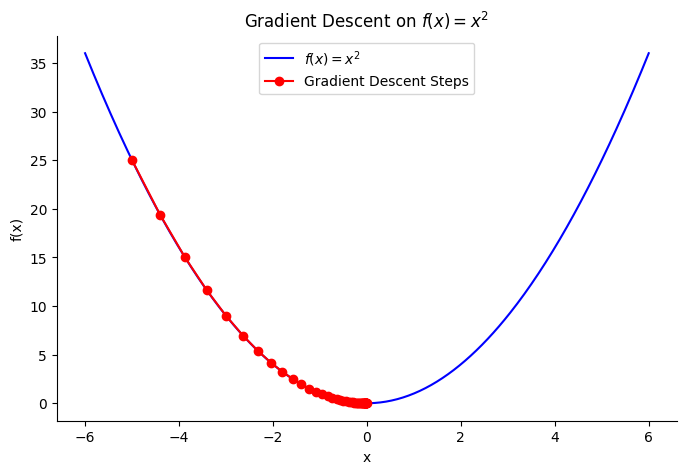

-0.008377291195866497


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   

def f(x):
    return x ** 2

def df(x):
    return 2 * x

# Parameters
learning_rate = 0.06
num_iterations = 50
x_start = -5.0

# Perform gradient descent
x_vals = [x_start]
for i in range(num_iterations):
    x_new = x_vals[-1] - learning_rate * df(x_vals[-1])
    x_vals.append(x_new)


# Plot the function and the gradient descent steps

x_grid = np.linspace(-6, 6, 400)
y_grid = f(x_grid)

plt.figure(figsize=(8, 5))
plt.plot(x_grid, y_grid, "b-", label="$f(x)=x^2$")
plt.plot(x_vals, f(np.array(x_vals)), "ro-", label="Gradient Descent Steps")
plt.title("Gradient Descent on $f(x)=x^2$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
sns.despine()
plt.show()
print(x_vals[-1])

Now, consider the function $f(x) = \sin(x) + 0.1 x^2$. The gradient of this function is 
$$
f'(x) = \cos(x) + 0.2x.
$$ 


The code below visualizes the gradient descent process for the function. It starts with an initial value of $x = -10$ and iteratively updates $x$ using the gradient descent formula for 100 iterations, with a learning rate of $\alpha = 0.01$. 

Change the learning rate to observe how it affects convergence. Also, modify the starting point to examine its influence on the convergence path. In particular, find a starting point that does **not** end in the global minimum.







<>:30: SyntaxWarning: invalid escape sequence '\s'
<>:32: SyntaxWarning: invalid escape sequence '\s'
<>:30: SyntaxWarning: invalid escape sequence '\s'
<>:32: SyntaxWarning: invalid escape sequence '\s'
/var/folders/zw/wyk4bycs5sjb6lt2q2xgbf040000gn/T/ipykernel_42307/311455381.py:30: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x_values, y_values, label='$f(x) = \sin(x) + 0.1*x^2$')
/var/folders/zw/wyk4bycs5sjb6lt2q2xgbf040000gn/T/ipykernel_42307/311455381.py:32: SyntaxWarning: invalid escape sequence '\s'
  plt.title("Gradient Descent on $f(x) = \sin(x) + 0.1*x^2$")


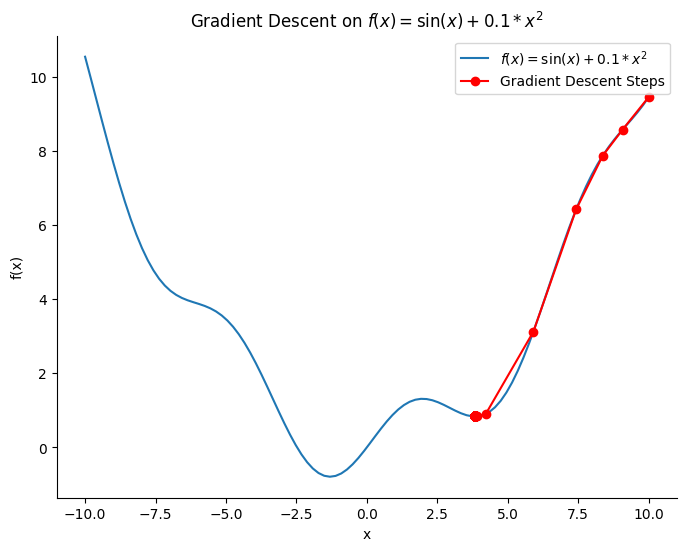

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function: f(x) = sin(x) + 0.1*x^2
def f(x):
    return np.sin(x) + 0.1 * x**2

# Define the derivative: f'(x) = cos(x) + 0.2*x
def df(x):
    return np.cos(x) + 0.2 * x

# Set up gradient descent parameters:
learning_rate = 0.8
num_iterations = 1_000_000
x_start = 10

# Perform gradient descent
x_vals = [x_start]
for i in range(num_iterations):
    current_x = x_vals[-1]
    grad = df(current_x)
    x_new = current_x - learning_rate * grad
    x_vals.append(x_new)


x_values = np.linspace(-10, 10, 100)
y_values = f(x_values)
# Plot the function with the gradient descent steps
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='$f(x) = \sin(x) + 0.1*x^2$')
plt.plot(x_vals, f(np.array(x_vals)), 'ro-', label='Gradient Descent Steps')
plt.title("Gradient Descent on $f(x) = \sin(x) + 0.1*x^2$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
sns.despine()
plt.show()


### Local Minima

Gradient descent is a powerful optimization technique, but it is inherently a local method. This means it relies solely on the local gradient, and once it converges to a **local minimum**, it has no mechanism to escape it. Below is an explanation of the problem and some strategies to overcome it.

Once the algorithm reaches a point where the gradient is zero (or nearly zero), it stops updating the parameters. At this point, it has converged to a local minimum. Since the gradient provides information only about the immediate neighborhood, it does not suggest any change that would lead it out of this local minimum.

For example, if you start at a point (e.g., $x = 5$ in the above graph) that leads to a local minimum, standard gradient descent will converge there and remain stuck. The algorithm lacks any inherent ability to move uphill and explore other regions of the function.

To avoid getting trapped in a local minimum, consider using one or more of the following strategies:

- **Random Restarts:**  
  Run gradient descent multiple times from different random starting points. This increases the chance that at least one run will start near the global minimum.

- **Stochastic Gradient Descent (SGD):**  
  Use mini-batches instead of the full dataset to compute the gradient. The inherent randomness (noise) in SGD can sometimes help the algorithm jump out of local minima.

- **Momentum:**  
  Incorporate momentum into the updates. Momentum accumulates past gradients to smooth the descent path, which can help overcome shallow local minima by maintaining some "inertia" even when the local gradient is near zero.

- **Advanced Global Optimization Methods:**  
  Methods such as simulated annealing or genetic algorithms introduce mechanisms to escape local minima by allowing occasional uphill moves, thus exploring the solution space more broadly.


### Gradient Descent in Two Dimensions

In this example, we illustrate gradient descent on a function of two variables. The function we use is:

$$
f(x,y) = \sin(x) + \sin(y) + 0.1\,(x^2+y^2)
$$

The function $f(x,y)$ combines periodic behavior (from $\sin(x)$ and $\sin(y)$) with a quadratic term $0.1\,(x^2+y^2)$ that grows as $|x|$ or $|y|$ increases.

* **Gradient:**  
  The gradient of $f(x,y)$ is a vector containing its partial derivatives, which indicate the direction of steepest ascent. For this function, the partial derivatives are:
  - With respect to $x$:
    $$
    \frac{\partial f}{\partial x} = \cos(x) + 0.2\,x
    $$
  - With respect to $y$:
    $$
    \frac{\partial f}{\partial y} = \cos(y) + 0.2\,y
    $$
  Thus, the gradient is:
  $$
  \nabla f(x,y) = \left(\cos(x) + 0.2\,x,\; \cos(y) + 0.2\,y\right)
  $$

- **Gradient Descent Update Rule:**  
  Gradient descent updates the variables $(x, y)$ by moving in the opposite direction of the gradient. The update rules are:
  $$
  x_{\text{new}} = x_{\text{old}} - \alpha \left(\cos(x_{\text{old}}) + 0.2\,x_{\text{old}}\right)
  $$
  $$
  y_{\text{new}} = y_{\text{old}} - \alpha \left(\cos(y_{\text{old}}) + 0.2\,y_{\text{old}}\right)
  $$
  where $\alpha$ is the learning rate.


The 3D plot shows the surface of $f(x,y)$ along with the path taken by gradient descent. We start from an initial point (e.g., $(-5, -5)$) and perform 100 iterations to track how the point moves towards a minimum.

 
Change the learning rate $\alpha$ to see how it affects the convergence speed and stability. Also, modify the starting point $(x,y)$ to explore how different initial positions can lead to different convergence behaviors, possibly even trapping the process in a local minimum instead of finding the global minimum.








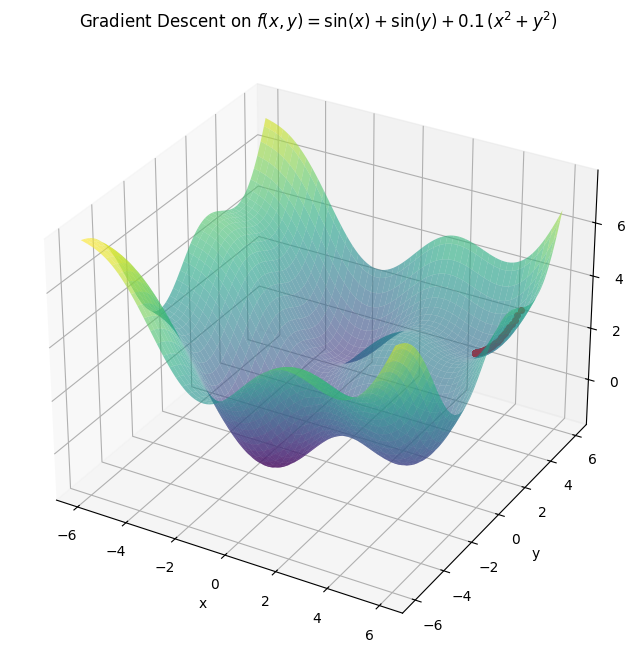

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function: f(x,y) = sin(x) + sin(y) + 0.1*(x^2 + y^2)
def f(x, y):
    return np.sin(x) + np.sin(y) + 0.1*(x**2 + y**2)

# Define the gradient of f:
# Partial derivative with respect to x: cos(x) + 0.2*x
# Partial derivative with respect to y: cos(y) + 0.2*y
def grad_f(x, y):
    dfdx = np.cos(x) + 0.2 * x
    dfdy = np.cos(y) + 0.2 * y
    return dfdx, dfdy

# Parameters for gradient descent
learning_rate = 0.06
num_iterations = 100
x_start, y_start = 5.0, 5.0  # Starting point

# Perform gradient descent and record the path
points = [(x_start, y_start)]
x_current, y_current = x_start, y_start

for i in range(num_iterations):
    dfdx, dfdy = grad_f(x_current, y_current)
    x_new = x_current - learning_rate * dfdx
    y_new = y_current - learning_rate * dfdy
    points.append((x_new, y_new))
    x_current, y_current = x_new, y_new

points = np.array(points)


# Set up a 3D plot for the surface and descent path
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a grid of x and y values to plot the surface
x_vals = np.linspace(-6, 6, 100)
y_vals = np.linspace(-6, 6, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

# Plot the surface
ax.plot_surface(X, Y, Z, alpha=0.6, cmap='viridis')

# Plot the gradient descent path on the surface
ax.plot(points[:, 0], points[:, 1], f(points[:, 0], points[:, 1]), 'r.-', markersize=8)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.set_title(r"Gradient Descent on $f(x,y)=\sin(x)+\sin(y)+0.1\,(x^2+y^2)$")
sns.despine()
plt.show()


## Gradient Descent for Minimizing Weights in a Neural Network

### Loss Functions

In machine learning, a **loss function** measures the error between the model's predictions $\hat{y}$ and the true labels $y$. 

We start by defining the loss for a single example as:
$$
\ell(y_0, \hat{y_0})
$$

where:
- $y_0$ is the true label, and
- $\hat{y_0}$ is the predicted value for that example.

#### Aggregate Loss Function

Given a model $f$ that produces predictions $f(x_i)$ for inputs $x_i$, the overall loss on a dataset of $N$ examples for a loss function $\ell$ is defined as:
$$
L(f, x, y) = \frac{1}{N} \sum_{i=1}^{N} \ell\big(y_i, f(x_i)\big)
$$

Here, $y_i$ is the true label for the $i$-th example, and $f(x_i)$ is the corresponding prediction.

#### Examples of Loss Functions

- **0-1 Loss:**
  $$
  \ell_{0-1}(y, \hat{y}) = \begin{cases} 
      0, & \text{if } y = \hat{y} \\
      1, & \text{if } y \neq \hat{y}
  \end{cases}
  $$
- **Hinge Loss (for binary classification with labels $-1$ and $1$):**
  $$
  \ell_{\text{hinge}}(y, \hat{y}) = \max\big(0, 1 - y \cdot \hat{y}\big)
  $$
- **Squared Error:**
  $$
  \ell_{\text{SE}}(y, \hat{y}) = \big(y - \hat{y}\big)^2
  $$


#### Minimizing the Loss

Consider a simple linear classifier defined by:

$$
f(x) = W \cdot x + b
$$

where:

- **$W$** is the weight vector,
- **$x$** is the input vector, and
- **$b$** is the bias term.

We can view the aggregate loss as a function of the model parameters $W$  and $b$:
$$
L(W, b) =  \frac{1}{N} \sum_{i=1}^{N} \ell\big(y_i, W\cdot x_i + b\big)
$$

The objective in training the neural network is to minimize $L(W, b)$ by adjusting $W$ and $b$. 

Gradient descent updates the parameters $W$ and $b$ iteratively by computing the gradients of the loss function with respect to these parameters. 


1. **Forward Pass:**  
   Compute the model output using the current parameters:

   $$
   f(x) = W \cdot x + b
   $$

2. **Loss Computation:**  
   Calculate the loss $L(W, b)$ by comparing the predictions $f(x)$ to the true labels $y$.

3. **Backward Pass (Backpropagation):**  
   Determine the gradients:
   
   $$
   \frac{\partial L}{\partial W} \quad \text{and} \quad \frac{\partial L}{\partial b}
   $$

   Update the weights and bias using the gradient descent update rules:

    $$
    W_{\text{new}} = W_{\text{old}} - \alpha \, \frac{\partial L}{\partial W}(W_{\text{old}})
    $$

    $$
    b_{\text{new}} = b_{\text{old}} - \alpha \, \frac{\partial L}{\partial b}(b_{\text{old}})
    $$

4. **Iteration:**  
   Repeat the forward pass, loss computation, backward pass, and update steps until the loss converges to a minimum.

This process gradually reduces the loss, adjusting the model parameters so that the predictions become more accurate. By iteratively applying these updates, gradient descent effectively "learns" the best values for $W$ and $b$ that minimize the loss function.







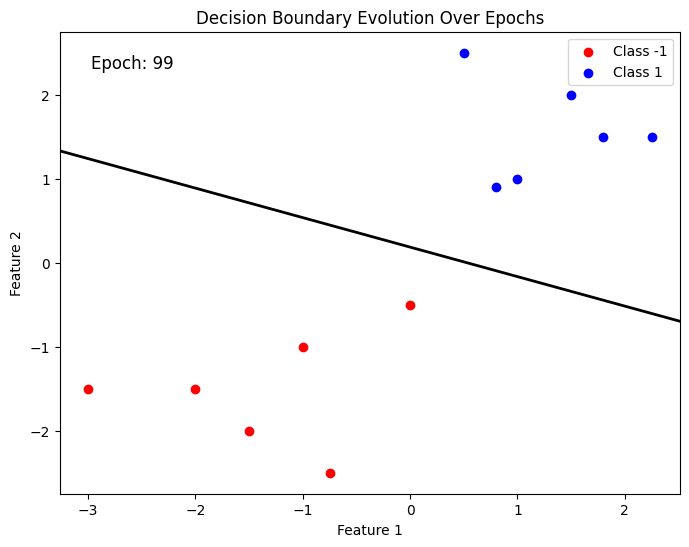

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import tensorflow as tf
from tensorflow.keras import Input, Sequential
from tensorflow.keras.layers import Dense

# 1. Define a custom callback to record the weights and bias at the end of each epoch.
class WeightHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.weights_history = []  # List to store (weights, bias) tuples.
    def on_epoch_end(self, epoch, logs=None):
        weights, bias = self.model.layers[0].get_weights()
        self.weights_history.append((weights.copy(), bias.copy()))

# 2. Define your dataset.
# For hinge loss, labels need to be -1 and 1.
X = np.array([
    [-1, -1], [-2, -1.5], [-1.5, -2], [-0.75, -2.5], [-3, -1.5], [0, -0.5], # Class -1
    [1, 1], [2.25, 1.5], [1.5, 2], [0.5, 2.5], [1.8, 1.5], [0.8, 0.9]           # Class 1
])
y = np.array([-1, -1, -1, -1, -1, -1,  1, 1, 1, 1, 1, 1])

# 3. Build the simple linear classifier model.
model = Sequential([
    Input(shape=(X.shape[1],)),       # Explicit input shape.
    Dense(1, activation='linear')       # Single neuron with linear activation.
])

# 4. Compile the model with SGD (which uses gradient descent) and hinge loss.
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05), loss='hinge')

# 5. Instantiate the weight history callback.
weight_history = WeightHistory()

# 6. Train the model for 100 epochs while recording the weight history.
model.fit(X, y, epochs=100, verbose=0, callbacks=[weight_history])

# 7. Set up the Matplotlib plot for animation.
fig, ax = plt.subplots(figsize=(8, 6))
# Plot the data points.
ax.scatter(X[y == -1, 0], X[y == -1, 1], color='red', label='Class -1')
ax.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1')
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_title("Decision Boundary Evolution Over Epochs")
ax.legend()

# Define a range of x-values for plotting the decision boundary.
x_vals = np.linspace(np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1, 100)
# Create an initial empty line for the decision boundary.
line, = ax.plot([], [], 'k-', lw=2, label='Decision Boundary')

# Display the epoch number in the plot.
epoch_text = ax.text(0.05, 0.95, '', transform=ax.transAxes, fontsize=12, verticalalignment='top')

def init():
    """Initialize the line and text for the animation."""
    line.set_data([], [])
    epoch_text.set_text('')
    return line, epoch_text

def animate(i):
    """Update the decision boundary line for epoch i."""
    weights, bias = weight_history.weights_history[i]
    w = weights.flatten()
    # Compute decision boundary: w1*x1 + w2*x2 + bias = 0  =>  x2 = -(w1*x1 + bias) / w2.
    if w[1] != 0:
        y_vals = -(w[0] * x_vals + bias) / w[1]
    else:
        # If w2 is zero, plot a vertical line.
        y_vals = np.full_like(x_vals, -bias/w[0])
    line.set_data(x_vals, y_vals)
    epoch_text.set_text("Epoch: {}".format(i))
    return line, epoch_text

# Create the animation: each frame corresponds to an epoch.
ani = animation.FuncAnimation(fig, animate, init_func=init,
                              frames=len(weight_history.weights_history),
                              interval=200, blit=True)

# To display the animation in a Jupyter notebook, uncomment the following lines:
from IPython.display import HTML
HTML(ani.to_jshtml())

# plt.show()
